# CSC578D Final Project

### Tengkai Yu(V00882453 ),          Yan He(V00890351),         Rui Liu(V00912440)

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Project Description
IMDb(Internet Movie Database) is an online database containing the information of diffrent kind of internet videos: movie, short, TV-series, TV-episode, video, etc. There is large amounts of useful information we can mining with. Our group is interested in finding out the relations or properties of such a huge dataset. Althrough the lecture introduced multiple mining methods, we can use only few of them because of the giant quantity of the database we are dealing with. One feature in this project is that we tried all possible method to improve the calculation efficiency and to reduce the mamory cost for doing these operation.
* (The data set we are using is too big to upload, please contact us if you want to re-run the project)

# Part 1: Data collection

Our group chose two highly related IMDb dataset.

* The first one is the official dataset provided by the IMDb website. 
https://datasets.imdbws.com/
The most important feature of this dataset is that this one provides unique IDs for every movie or episode (start with "tt") as well as for every movie contributor (start with "nm").
This dataset also shows some fundamental attributes for movies such as title, year and genres. While the relations between movies and contributed are stored within, these relations are very hard to mine since they are very sparse and could not be put into main memory in an efficient way.

* The second dataset was collected by Stanford University.
http://ai.stanford.edu/~amaas/data/sentiment/
This data set not only gives the reviews (pos and neg) on both training set (manual labeled) and testing set but also attached the URL for these reviews from the IMDb website. From these URL we can easily isolate the movie ID of this review. By this advantage, we can combine this huge dataset with the rating dataset given by the IMDb website. Our group is trying to generate regression showing how reviews can affect a movies' rate and will be shown below. Unfortunatly, the regression experiment failed due to the huge amount of data. However, our group achieved to the goal of classifying the identity of reviews using naive Bayes.

# Part 2: Data visualization

The four most important datases are the datasets of "title.basic", "name.basic", "title.ratings" and "title.principals"

* "title.basic" shows the most foundamental information of the movie and we are interested in their types and genres. The first feature will be visualized in this part while the second one will be mined by the Apriori method.
* "name.basic" stores the basic info for the movie workers but we are not going to focus on this table for this time.
* "title.ratings" are the rating for the movies, we are trying to mine some helpful infomation out of this dataset but it will be visualized in this part first
* "title.principals" contains the principal cast/crew for titles, we will show the distribution of the number of group members among movies.

In [2]:
# four most basic database

# basic infomation for all titles
title_basic = pd.read_csv("datasets/title.basics.tsv", sep='\t')
# basic infomation for all names
name_basic = pd.read_csv("datasets/name.basics.tsv", sep='\t')
# rating for all titles
title_ratings = pd.read_csv("datasets/title.ratings.tsv", sep='\t')
#principal crew for all titles
title_principals = pd.read_csv("datasets/title.principals.tsv", sep='\t')

In [3]:
title_basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
# number of titles
title_basic.shape[0]

5432202

In [5]:
# types
title_basic["titleType"].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

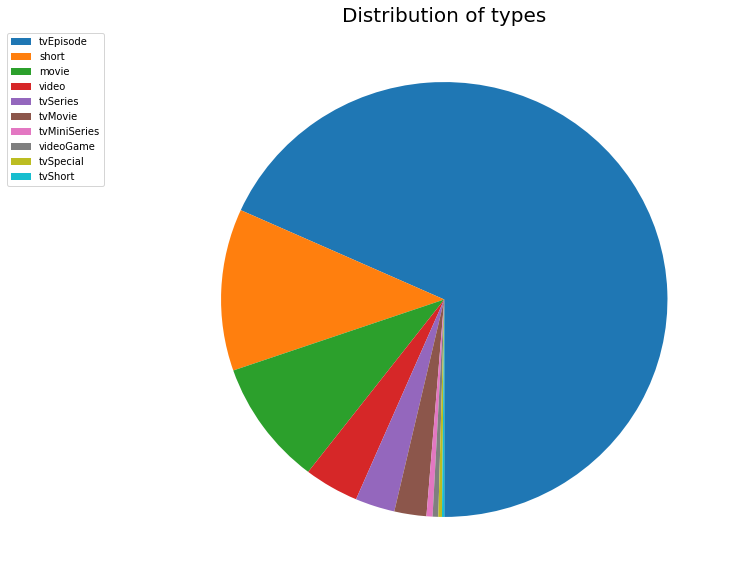

In [6]:
# distribution of type
labels = title_basic["titleType"].value_counts(sort = True).index
sizes = title_basic["titleType"].value_counts(sort = True)
rcParams['figure.figsize'] = 10,10

patches, texts = plt.pie(sizes, startangle=270)
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)
plt.title('Distribution of types',size = 20)
plt.show()

In [7]:
name_basic.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0043044,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0054452,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0072562,tt0077975,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0060827,tt0050976"


In [8]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1440
1,tt0000002,6.3,172
2,tt0000003,6.6,1041
3,tt0000004,6.4,102
4,tt0000005,6.2,1737


Text(0.5,1,'Distribution of Rating')

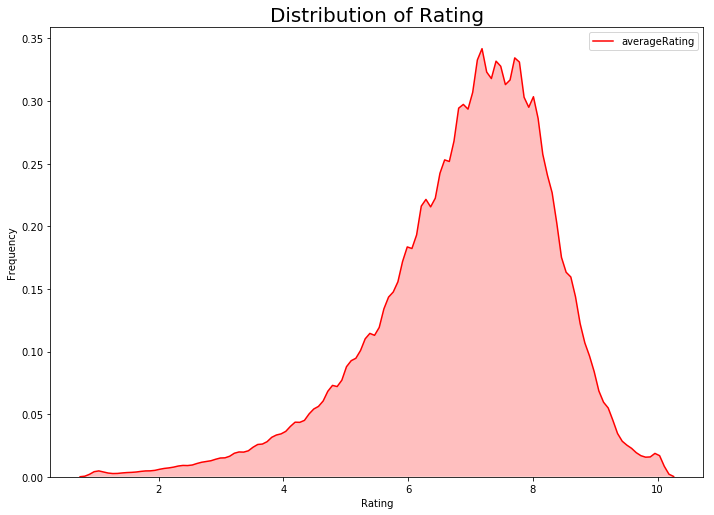

In [9]:
# we want to know the distribution of ratings
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(title_ratings.averageRating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Text(0.5,1,'Distribution of Number of Votes')

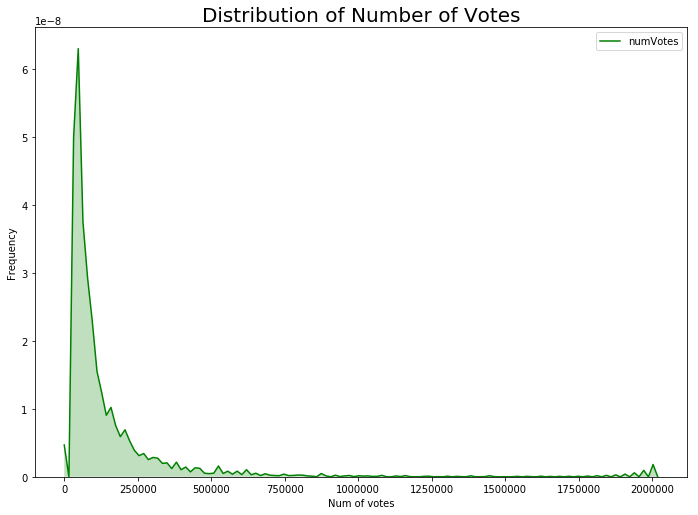

In [10]:
title_ratings['numVotes']=title_ratings['numVotes'].apply(lambda x: int(x))
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(title_ratings.numVotes, color="Green", shade = True)
g.set_xlabel("Num of votes")
g.set_ylabel("Frequency")
plt.title('Distribution of Number of Votes',size = 20)
#Most of movies have less than 250000 votes.
#Obviously, well-known ones have a lot of votes

#### The Relationship between Number of Votes and Average Rating

Here we want to find wheather the number of votes is related to the ratings.

The results show that, if a movie has really lots of votes, it is predicted to has a high average rating, more than 8.

The reason we guess maybe, if a movie has lots of votes, it must have hots of voters/audiences,  which means it's a "good" movie.

<Figure size 720x720 with 0 Axes>

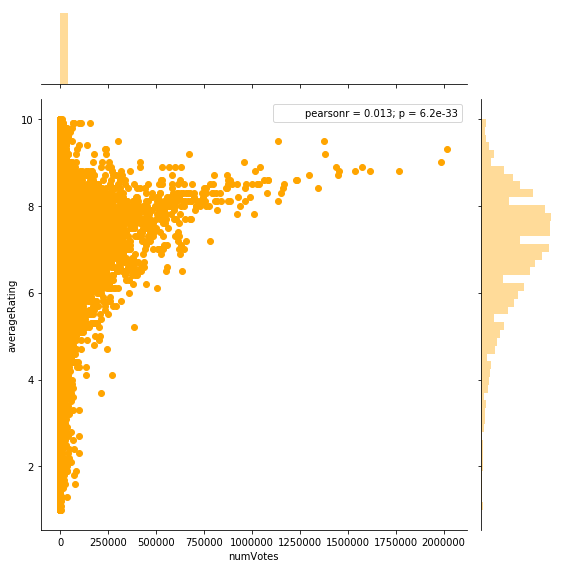

In [11]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="numVotes", y="averageRating",color = 'orange', data=title_ratings,size = 8);


#### The Relationship between Number of Votes and Average Rating

The figure above shows that most of movies have less than 200 000 votes, only a few have lots of votes. 

So we show the relation with a constrained number of votes. (numVotes<200 000)

Then we find the distribution is similar to the picture above. The movies with much more voters, has a higher rating.

Text(0.5,1,'Rating VS Votes')

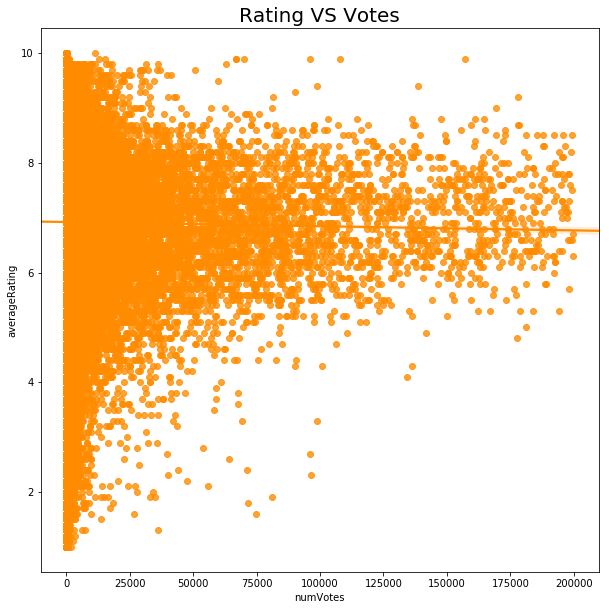

In [12]:
plt.figure(figsize = (10,10))
sns.regplot(x="numVotes", y="averageRating", color = 'darkorange',data=title_ratings[title_ratings['numVotes']<200000]);
plt.title('Rating VS Votes',size = 20)
#The figure above shows that most of movies have less than 200000 votes, only a few have lots of votes. 
#So we show the relation with a constrained  number of votes.
#Then we find the distribution is the same with the picture above. The movies with much more voters, has a higher rating.

# Part 3:Data Preprocessing and Data Mining

## Section 3.1: Apriori method

Apriori is the data mining method in order to find the frequent combinations within a dataset. However, it turns out that Apriori is extremely memory costly and inefficient when the relations are sparse. For example, our group planned to mine the frequent group combination of principles (actors, actress, directors etc.) at the beginning of this project. Unfortunately,  we find the truth table will require the size of (# of movies = 4 million) times (# of principles = 3 million) which is not possible to fit into our PC memory. After all possible manual reduction and pruning, the table can finally fit into a 12 GB memory but it takes forever to evaluate through the Apriori method.

We turn to mine the frequent combination of genres. For example, a movie with the genre "Animation" might also have genre "Action", thus the combination of these two might be frequent. There are only 28 genres in this dataset so we can fit these values into the memory and evaluate the result within a shorter time period.

In [13]:
# In order to analyse genres we need to load the database "title.basics"

title_basic = pd.read_csv("datasets/title.basics.tsv", sep='\t')
title_basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
# the online library requires a list of list of elements to build the truth table
# we pick the "genre" column from the title_basic df and store into the required form
# the df has about 4 million rows, so this step is the most time costly one

# build up a big list for truth table
big_list = []
for i in range(title_basic["genres"].shape[0]):
    if title_basic["genres"][i] and title_basic["genres"][i] != "\\N":
        try:
            big_list.append(title_basic["genres"][i].split(","))
        except:
            print(title_basic["genres"][i])


nan
nan


In [15]:
# translate the principal list into the truth table
te = TransactionEncoder()
te_ary = te.fit(big_list).transform(big_list)
# build the apriori dataframe
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)
apriori_df.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [16]:
# run the apriori method
# althrough the support only require 0.001, but recall that we have more than 4 million rows
# so this is actually very high support requirement
apriori_result = apriori(apriori_df, min_support=0.001, use_colnames=True)

In [17]:
# we are not interested in the short combinations or individuals
# for example, the genre "Animation" will certainly apprears many times as everyone expected
# we only want the combinations of size at least 3
apriori_result[apriori_result["itemsets"].str.len() >= 3]

,support,itemsets
149,0.006381,"(Animation, Adventure, Action)"
150,0.001735,"(Comedy, Adventure, Action)"
151,0.001005,"(Adventure, Crime, Action)"
152,0.001714,"(Adventure, Drama, Action)"
153,0.002506,"(Comedy, Animation, Action)"
154,0.001271,"(Comedy, Drama, Action)"
155,0.004326,"(Crime, Drama, Action)"
156,0.003086,"(Animation, Adventure, Comedy)"
157,0.001214,"(Animation, Adventure, Family)"
158,0.001160,"(Adventure, Drama, Comedy)"


## Section 3.2: NLP method
NLP(Natural Language Processing) basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understands. In this section, we will first clean the datasets and then write a program to train the datasets. 

Here we use the dataset of comments to the movies. The comments are divided to two types, positive and negtive. We will use our program to classify new comments.

### 3.2.1: Data Preprocessing

Because the original dataset contained punctuation and irrelevant words, we started with cleaning data, in other words,  removing all punctuations and stopwords.

Here we give an example of the original comment:

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
    
As the original comments are all seperate documents. So we still need to do the following tasks:
1. Merge all the seperate documents to one document.
2. Each paragraph in the new document should end with '\n'.
3. Each paragraph in the new document is one comment.
4. A new document should be generated as the label document for all the coments.
5. there should be a one-to-one correspondence between the labels in the label document and the comments.
6. In the label document, each line is a label end with '\n'.
7. Label 1 means it's a positive comment while 0 means a negative comment.

We finally generate four documents.
1. testdata.txt: the comments for test.
2. testlabel.txt: the true label values of the test comments. It's used for evaluation.
3. traindata.txt: all the comments, either positive or negative, for training.
4. trainlabel.txt: the labels for trainning comments.

In [33]:
from string import punctuation
import os
import glob

def strip_punctuation(s):
    """ Takes in a string of text, then performs the following:

    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    query=''.join(c for c in s if c not in punctuation)
    #query = s
    stopwords = ['Im','his','her','what','who','to','it','that','this','is','a',
                 'about','with','the','in','on','at','is','he','I','she','an']
    querywords = query.split()

    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    return result

traindata = open('datasets/train/traindata.txt', 'w')
trainlabel = open('datasets/train/trainlabel.txt', 'w')

path = 'datasets/train/pos2/'
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename,'r') as comment:
        commentdata=comment.read().replace('\n', '')
        commentdata=strip_punctuation(commentdata)
        commentdata=' '.join(commentdata.split())     
        traindata.write(commentdata+'\n')
        trainlabel.write('1\n')
        
path = 'datasets/train/neg2/'
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename,'r') as comment:
        commentdata=comment.read().replace('\n', '')
        commentdata=strip_punctuation(commentdata)
        commentdata=' '.join(commentdata.split())     
        traindata.write(commentdata+'\n')
        trainlabel.write('0\n')


testdata = open('datasets/test/testdata.txt', 'w')
testlabel = open('datasets/test/testlabel.txt', 'w')

path = 'datasets/test/pos2'
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename,'r') as comment:
        commentdata=comment.read().replace('\n', '')
        commentdata=strip_punctuation(commentdata)
        commentdata=' '.join(commentdata.split())     
        testdata.write(commentdata+'\n')
        testlabel.write('1\n')
        
path = 'datasets/test/neg2'
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename,'r') as comment:
        commentdata=comment.read().replace('\n', '')
        commentdata=strip_punctuation(commentdata)
        commentdata=' '.join(commentdata.split())     
        testdata.write(commentdata+'\n')
        testlabel.write('0\n')
        

### 3.2.2: Training and Test

Here we use text classification algorithm to train and test our databases.

We will train the data in document "traindatatxt" with it's label document "trainlabel.txt".
The test data are in the document "testdata.txt". "testlable.txt" is the document with true labels of the test data.
The classification result will be stored in a new document named "results.txt". 
In the end, we will compute the accuracy with this two label documents.


### 3.2.3: Results and Future Work

If we use a different test dataset with the training one, the accuracy is: 0.775609756097561.
If we use a test dataset the same with the training one, the accuracy is: 0.9195121951219513

In the future, we will use some database of stopwords, which can help us to prepocess the original data better and purer.



In [4]:
#Here we use text classification algorithm to train and test our databases.


from numpy import *

#We will train the data in document "traindata" with it's label document "trainlabel".
#The test data are in the document "testdata". "testlable" is the document with true labels of the test data.
#the classification result will be stored in a new document named "results". 
#In the end, we will compute the accuracy with this two label documents.


document_train_data='traindata'
document_train_label='trainlabel'
document_test_data='testdata' #or testdata
document_test_label='testlabel' #or testlabels

def fun_trainset_loading(): #load train set and test set from documents
   
    trainset=[] #data set for training
    trainclass=[] #data set class value

    with open('datasets/train/'+document_train_data+'.txt','r') as trainfile:
        for eachline in trainfile.readlines():
         trainset.append(list(map(str,eachline.strip().split(" "))))
         #each line and each word
   
    with open('datasets/train/'+document_train_label+'.txt','r') as trainclassfile:
        for eachline in trainclassfile.readlines():
            trainclass.append(int(eachline.strip()))
    return trainset, trainclass

def fun_creat_dictionary(doc_trainset):  #like the first line of the table, get all words without duplication
    mydic=set([])
    for eachword in doc_trainset:
        mydic=mydic|set(eachword) # in case the dulplication
    return list(mydic)

def fun_train_table(dictionary_list, instance_accounting):  
    table_value=[0]*len(dictionary_list)
    for word in instance_accounting: #accounting each word in the instance
         if word in dictionary_list:
             dic_index=dictionary_list.index(word)
             table_value[dic_index]=1 #else euqals to 0
    return table_value

def fun_get_probability(comp_traintable, comp_trainset, comp_trainclass):
    num_words=len(comp_traintable[0]) #num of words in dictionary
    num_1=comp_trainclass.count(1) # how many class 1 in the given set
    num_0=comp_trainclass.count(0) # how many class 0 in the given set
    # print('num_words:'+str(num_words))
    prob_c=num_1/len(comp_trainclass) #P(c)
    prob_tc=[0]*num_words #P(t|c) for all words in dictionary
    prob_not_tc=[0]*num_words #P(t|-c) for all words in dictionary

    for i in range(len(comp_trainclass)):
        if comp_trainclass[i]==1:
            for j in range(num_words):
                try:
                    if comp_traintable[i][j]==1:
                        prob_tc[j]+=1
                except:
                    print(comp_traintable[i])
        if comp_trainclass[i]==0:
            for j in range(num_words):
                if comp_traintable[i][j]==1:
                    prob_not_tc[j]+=1


    for i in range(num_words):
        prob_tc[i]=(1+prob_tc[i])/(num_1+2)
        prob_not_tc[i]=(1+prob_not_tc[i])/(num_0+2)
        #for all words get their P(t|c) and P(t|-c)
        #avoid 0 frequency problem

    #print('prob_c'+str(prob_c))
    #print('prob_tc')
    #print(prob_tc)
    return prob_c, prob_tc, prob_not_tc

def compare_prob(instance, dictionary, data_prob_c, data_prob_tc, data_prob_not_tc):
    prob_1=data_prob_c #just compare, no need to consider alpha
    prob_0=1-data_prob_c
    result=0

    for i in range(len(dictionary)):
        if str(dictionary[i]) in instance:
            prob_1*=data_prob_tc[i]
            prob_0*=data_prob_not_tc[i]
        if dictionary[i] not in instance:
            prob_1*=(1-data_prob_tc[i])
            prob_0*=(1-data_prob_not_tc[i])
    
            
    if prob_1>=prob_0: 
        result=1 #else =0

    #print('prob1:'+str(prob_1)+'\n prob2:'+str(prob_0))

    return result




def fun_train_test():
    given_train_set, given_train_class = fun_trainset_loading() #get training data set
    dictionary = fun_creat_dictionary(given_train_set)
    train_table=[]
    for eachinstance in given_train_set:
        train_table.append(fun_train_table(dictionary, eachinstance)) #each line in the table, and finally get a full table
        
    # print(train_table) #check the table
    data_pc, data_pt, data_pnt= fun_get_probability(train_table, given_train_set, given_train_class)
    
    resultfile=open('datasets/results.txt','w')
    resultfile.write('The training set is '+document_train_data +'\n')
    resultfile.write('The testing set is '+document_test_data +'\n')
    #write

    resultlist=[]
        
    with open('datasets/test/'+document_test_data+'.txt','r') as testfile:
        for line in testfile.readlines():
            testdata=list(map(str,line.strip().split(" "))) # all words in one line/instance
            # print(testdata)
            oneins=set(testdata)
            resultlist.append(compare_prob(list(oneins), dictionary, data_pc, data_pt, data_pnt))
 
    print(resultlist)
    truevalue=[]#get the given true value from document
    with open('datasets/test/'+document_test_label+'.txt','r') as testclassfile:
        for line in testclassfile.readlines():
            truevalue.append(int(line.strip()))

    import numpy as numpy01
    myresult=numpy01.array(resultlist)
    givenresult=numpy01.array(truevalue)
    accuricy=sum(myresult==givenresult)/len(resultlist)
    print(accuricy)

    resultfile.write('The accurity is :'+str(accuricy)+'\n')

    for i in resultlist:
        i=str(i)
        resultfile.write(i+'\n')
    resultfile.close()  
    return train_table
# start training and test

train_table = fun_train_test()

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
0.6224489795918368


## Section 3.3: K-NN method
Since we already processed the reviews into binary list of features, way don't we find our how are they related to each other? K-NN is a very efficient way to show the relations to elements. This method will show the k (in this experiment, 10) nearest neighbours among 98 training sets. Hopefully we will see a matrix with more "1"s on the top-left corner and bottom-right corner since this means that positive (or negative) reviews are similiar to each other.

### 3.3.1: K-NN matrix

We are using the K-NN library by sklearn

In [3]:
from sklearn.neighbors import NearestNeighbors

In [9]:
training_array = np.array(train_table)

In [10]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(training_array)

In [17]:
knn_matrix = nbrs.kneighbors_graph(training_array).toarray()

In [30]:
top_left = knn_matrix[0:50, 0:50]
top_right = knn_matrix[0:50, 50:]
bottom_left = knn_matrix[50:, 0:50]
bottom_right = knn_matrix[50:, 50:]

In [31]:
top_left.sum()

406.0

In [32]:
top_right.sum()

94.0

In [33]:
bottom_left.sum()

327.0

In [34]:
bottom_right.sum()

153.0

### 3.3.2: Conclusion

Surprisingly, we found the negative reviews are not very similiar to each other. The 10 nearest neighbours of negative reviews are mostly lying in the bottomleft submatrix. This can conlude a law for reviews:
* The positives reviews follows the same pattern while the negative reviews differ from each other